In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv("credit_card_transactions.csv")
data.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Amount,Merchant_Category,Transaction_Type,Card_Type,Location,Is_Fraud
0,1,1051,2023-01-01 00:00:00,12424.16,Grocery,Credit,RuPay,Chennai,0
1,2,1092,2023-01-01 01:00:00,17830.84,Electronics,Debit,Visa,Mumbai,0
2,3,1014,2023-01-01 02:00:00,37904.41,Electronics,Credit,MasterCard,Delhi,0
3,4,1071,2023-01-01 03:00:00,768.95,Clothing,Credit,Amex,Bangalore,0
4,5,1060,2023-01-01 04:00:00,5847.83,Electronics,Credit,Visa,Chennai,0


In [6]:
data.shape

(500, 9)

In [7]:
data.columns

Index(['Transaction_ID', 'Customer_ID', 'Transaction_Date',
       'Transaction_Amount', 'Merchant_Category', 'Transaction_Type',
       'Card_Type', 'Location', 'Is_Fraud'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      500 non-null    int64  
 1   Customer_ID         500 non-null    int64  
 2   Transaction_Date    500 non-null    object 
 3   Transaction_Amount  500 non-null    float64
 4   Merchant_Category   500 non-null    object 
 5   Transaction_Type    500 non-null    object 
 6   Card_Type           500 non-null    object 
 7   Location            500 non-null    object 
 8   Is_Fraud            500 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 35.3+ KB


In [9]:
data.describe()

,Transaction_ID,Customer_ID,Transaction_Amount,Is_Fraud
count,500.000000,500.00000,500.000000,500.000000
mean,250.500000,1048.87400,25006.963140,0.054000
std,144.481833,29.56983,14713.413927,0.226244
min,1.000000,1000.00000,281.370000,0.000000
25%,125.750000,1023.00000,12160.642500,0.000000
50%,250.500000,1050.00000,25171.270000,0.000000
75%,375.250000,1072.25000,37802.935000,0.000000
max,500.000000,1099.00000,49985.900000,1.000000


In [12]:
data.duplicated().sum()

np.int64(0)

In [13]:
data['Transaction_Date'] = pd.to_datetime(data['Transaction_Date'])

# Extract useful time features
data['Year'] = data['Transaction_Date'].dt.year
data['Month'] = data['Transaction_Date'].dt.month
data['Hour'] = data['Transaction_Date'].dt.hour

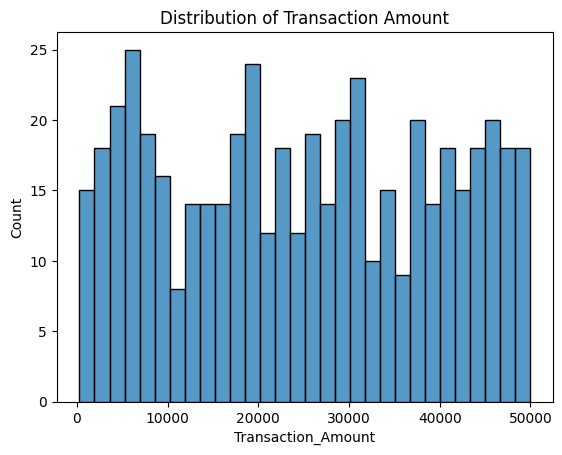

In [14]:
plt.figure()
sns.histplot(data['Transaction_Amount'], bins=30)
plt.title("Distribution of Transaction Amount")
plt.show()

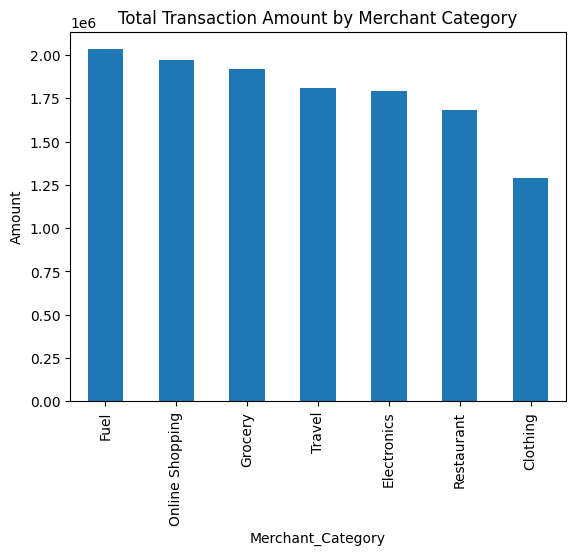

In [15]:
category_amount = data.groupby('Merchant_Category')['Transaction_Amount'].sum().sort_values(ascending=False)

plt.figure()
category_amount.plot(kind='bar')
plt.title("Total Transaction Amount by Merchant Category")
plt.ylabel("Amount")
plt.show()

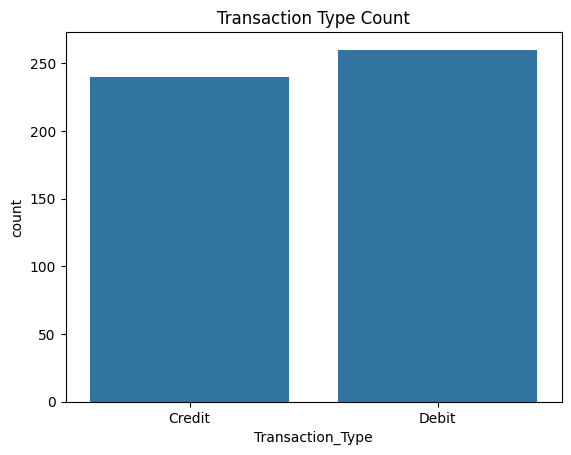

In [16]:
plt.figure()
sns.countplot(x='Transaction_Type', data=data)
plt.title("Transaction Type Count")
plt.show()

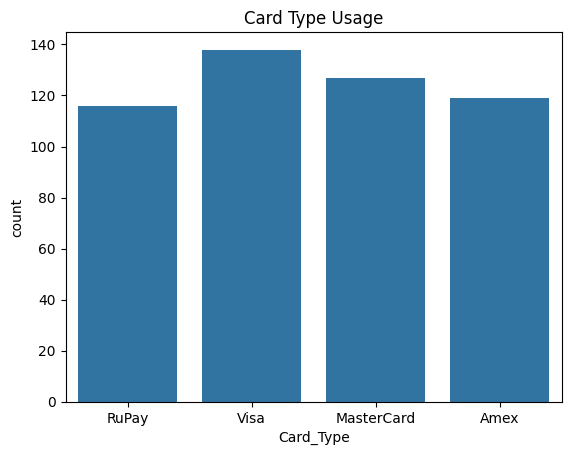

In [17]:
plt.figure()
sns.countplot(x='Card_Type', data=data)
plt.title("Card Type Usage")
plt.show()

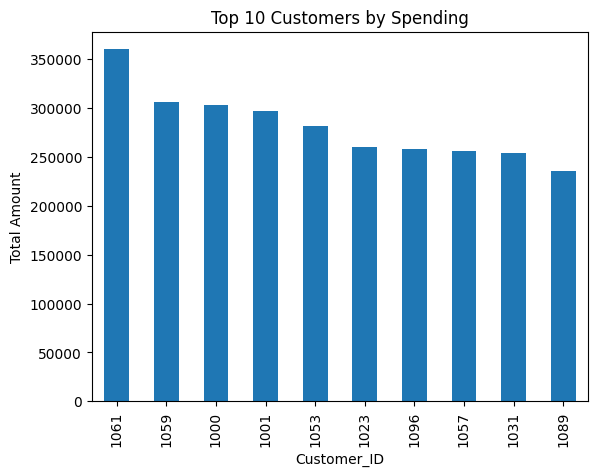

In [18]:
top_customers = data.groupby('Customer_ID')['Transaction_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Amount")
plt.show()

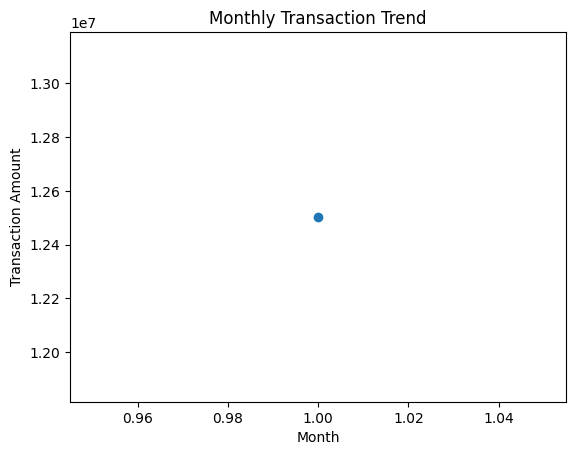

In [19]:
monthly_trend = data.groupby('Month')['Transaction_Amount'].sum()

plt.figure()
monthly_trend.plot(marker='o')
plt.title("Monthly Transaction Trend")
plt.xlabel("Month")
plt.ylabel("Transaction Amount")
plt.show()


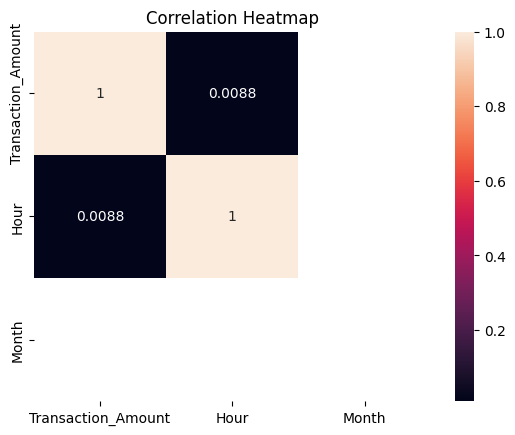

In [20]:
plt.figure()
sns.heatmap(data[['Transaction_Amount','Hour','Month']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

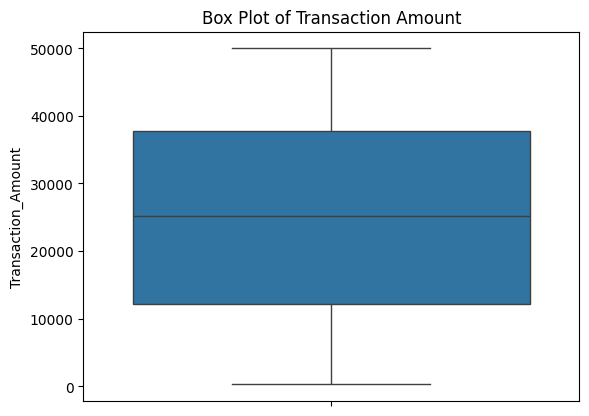

In [21]:
plt.figure()
sns.boxplot(y=data['Transaction_Amount'])
plt.title("Box Plot of Transaction Amount")
plt.show()

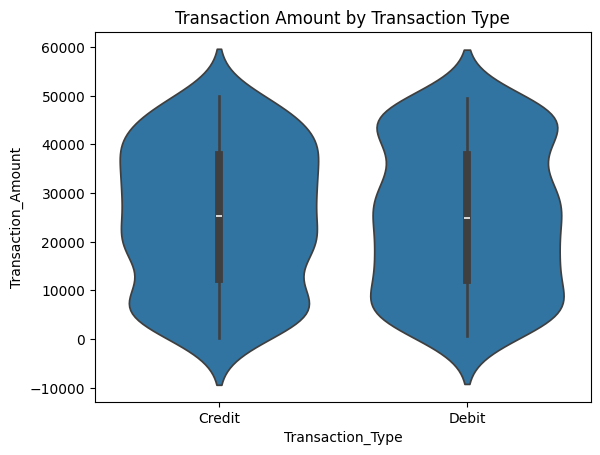

In [22]:
plt.figure()
sns.violinplot(x='Transaction_Type', y='Transaction_Amount', data=data)
plt.title("Transaction Amount by Transaction Type")
plt.show()

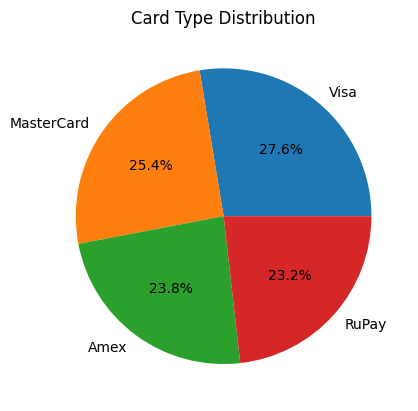

In [23]:
card_counts = data['Card_Type'].value_counts()

plt.figure()
plt.pie(card_counts, labels=card_counts.index, autopct='%1.1f%%')
plt.title("Card Type Distribution")
plt.show()

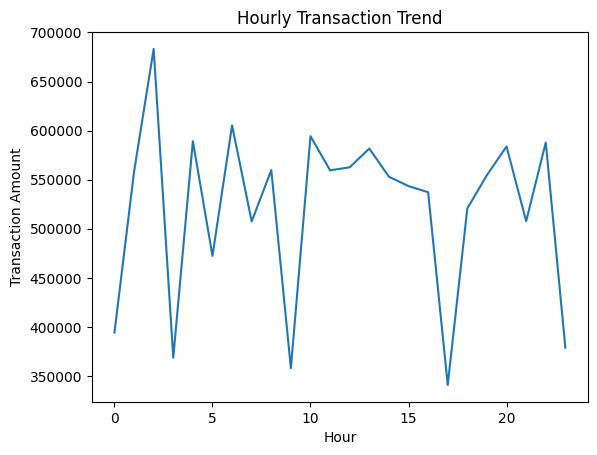

In [24]:
hourly = data.groupby('Hour')['Transaction_Amount'].sum()

plt.figure()
plt.plot(hourly)
plt.title("Hourly Transaction Trend")
plt.xlabel("Hour")
plt.ylabel("Transaction Amount")
plt.show()

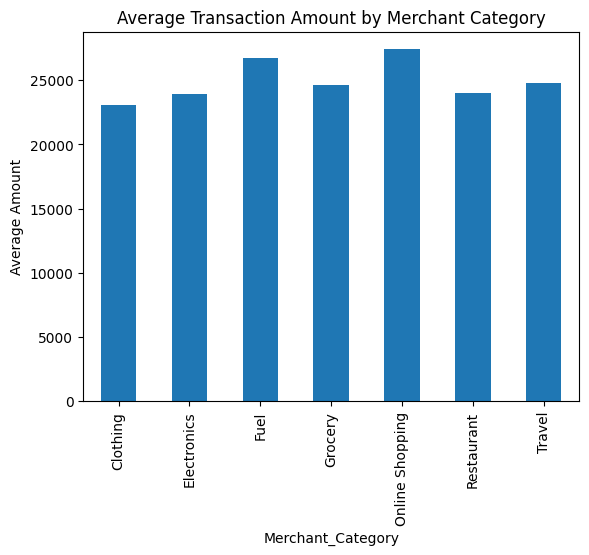

In [25]:
avg_amount = data.groupby('Merchant_Category')['Transaction_Amount'].mean()

plt.figure()
avg_amount.plot(kind='bar')
plt.title("Average Transaction Amount by Merchant Category")
plt.ylabel("Average Amount")
plt.show()

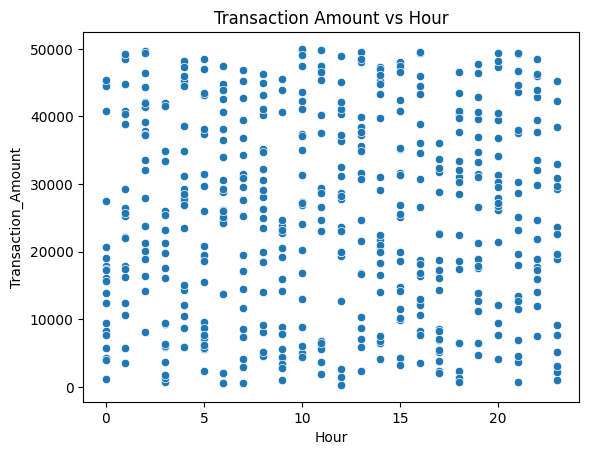

In [26]:
plt.figure()
sns.scatterplot(x='Hour', y='Transaction_Amount', data=data)
plt.title("Transaction Amount vs Hour")
plt.show()

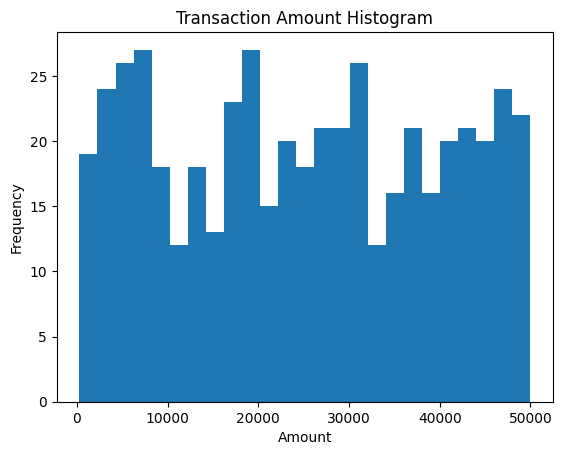

In [27]:
plt.figure()
plt.hist(data['Transaction_Amount'], bins=25)
plt.title("Transaction Amount Histogram")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

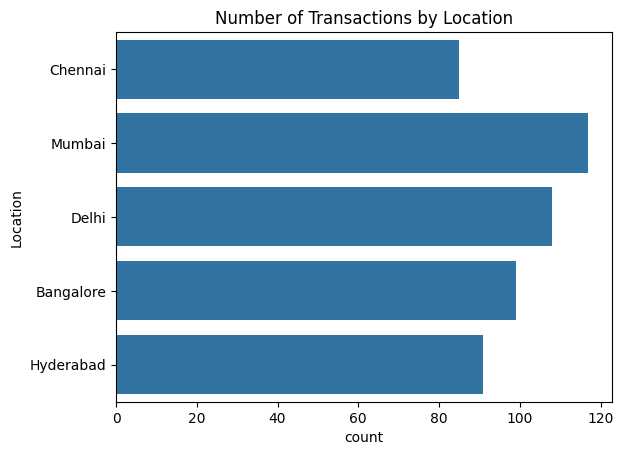

In [28]:
plt.figure()
sns.countplot(y='Location', data=data)
plt.title("Number of Transactions by Location")
plt.show()

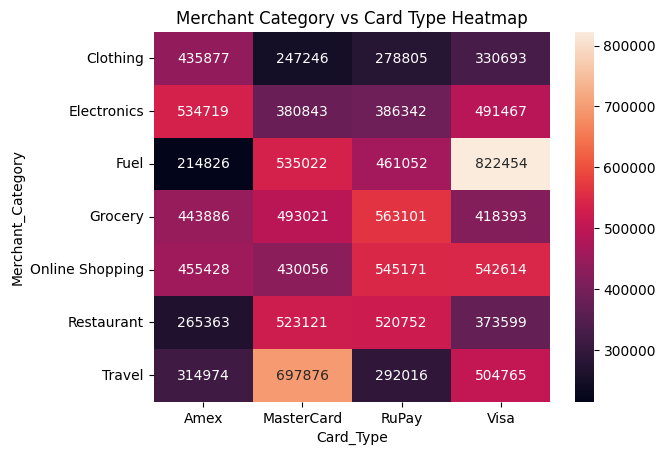

In [29]:
pivot = pd.pivot_table(
    data,
    values='Transaction_Amount',
    index='Merchant_Category',
    columns='Card_Type',
    aggfunc='sum'
)

plt.figure()
sns.heatmap(pivot, annot=True, fmt=".0f")
plt.title("Merchant Category vs Card Type Heatmap")
plt.show()

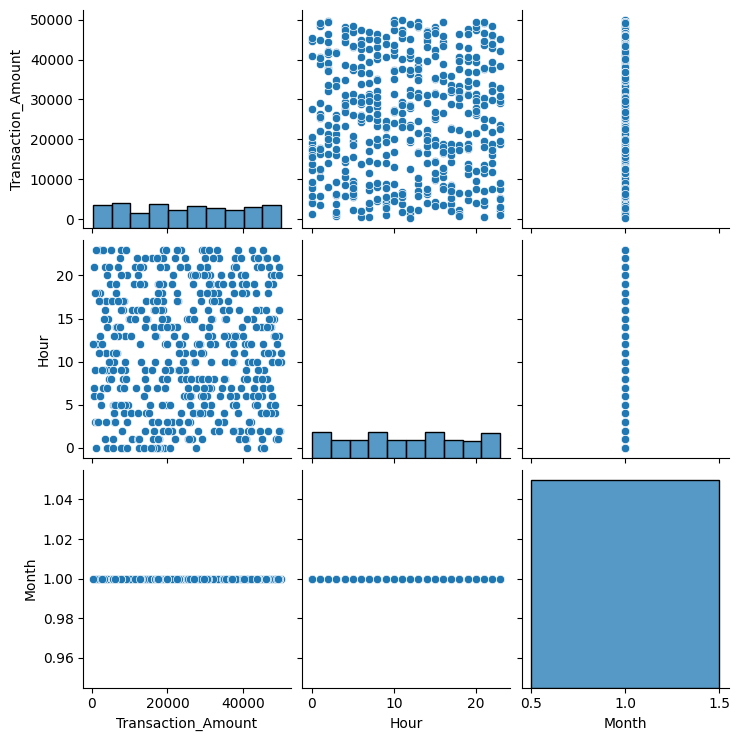

In [30]:
sns.pairplot(data[['Transaction_Amount','Hour','Month']])
plt.show()